<a href="https://colab.research.google.com/github/akdspw/006958/blob/master/Copy_of_Solar_LSTM_Test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd

/content


In [5]:
!ls

drive  sample_data


In [6]:
!pip install -q keras

In [7]:
import keras

In [8]:
data_path = '/content/drive/My Drive/Colab Notebooks/data/SOLARFARM1_15MIN_201001_201804_lag_96_addition.csv'

In [9]:
import pandas as pd
# Import the data with DateTime index
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(data_path, index_col='dattim')

In [10]:
df.head(2)

,avepow,avepow_t-1,avepow_t-2,avepow_t-3,avepow_t-4,avepow_t-5,avepow_t-6,avepow_t-7,avepow_t-8,avepow_t-9,avepow_t-10,avepow_t-11,avepow_t-12,avepow_t-13,avepow_t-14,avepow_t-15,avepow_t-16,avepow_t-17,avepow_t-18,avepow_t-19,avepow_t-20,avepow_t-21,avepow_t-22,avepow_t-23,avepow_t-24,avepow_t-25,avepow_t-26,avepow_t-27,avepow_t-28,avepow_t-29,avepow_t-30,avepow_t-31,avepow_t-32,avepow_t-33,avepow_t-34,avepow_t-35,avepow_t-36,avepow_t-37,avepow_t-38,avepow_t-39,...,avepow_t-60,avepow_t-61,avepow_t-62,avepow_t-63,avepow_t-64,avepow_t-65,avepow_t-66,avepow_t-67,avepow_t-68,avepow_t-69,avepow_t-70,avepow_t-71,avepow_t-72,avepow_t-73,avepow_t-74,avepow_t-75,avepow_t-76,avepow_t-77,avepow_t-78,avepow_t-79,avepow_t-80,avepow_t-81,avepow_t-82,avepow_t-83,avepow_t-84,avepow_t-85,avepow_t-86,avepow_t-87,avepow_t-88,avepow_t-89,avepow_t-90,avepow_t-91,avepow_t-92,avepow_t-93,avepow_t-94,avepow_t-95,avepow_t-96,avetem,avegloirr,avewinspe
dattim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2.17,23.85,98.61,110.07,169.02,22.48,361.11,302.80,358.23,57.00,60.95,225.13,...,23.45,31.19,20.71,16.14,18.04,13.37,1.65,0.14,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.78,0.2,7.85
2010-01-02 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,2.17,23.85,98.61,110.07,169.02,22.48,361.11,302.80,358.23,57.00,60.95,...,37.57,23.45,31.19,20.71,16.14,18.04,13.37,1.65,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.22,0.2,8.30


In [11]:
df.tail(2)

,avepow,avepow_t-1,avepow_t-2,avepow_t-3,avepow_t-4,avepow_t-5,avepow_t-6,avepow_t-7,avepow_t-8,avepow_t-9,avepow_t-10,avepow_t-11,avepow_t-12,avepow_t-13,avepow_t-14,avepow_t-15,avepow_t-16,avepow_t-17,avepow_t-18,avepow_t-19,avepow_t-20,avepow_t-21,avepow_t-22,avepow_t-23,avepow_t-24,avepow_t-25,avepow_t-26,avepow_t-27,avepow_t-28,avepow_t-29,avepow_t-30,avepow_t-31,avepow_t-32,avepow_t-33,avepow_t-34,avepow_t-35,avepow_t-36,avepow_t-37,avepow_t-38,avepow_t-39,...,avepow_t-60,avepow_t-61,avepow_t-62,avepow_t-63,avepow_t-64,avepow_t-65,avepow_t-66,avepow_t-67,avepow_t-68,avepow_t-69,avepow_t-70,avepow_t-71,avepow_t-72,avepow_t-73,avepow_t-74,avepow_t-75,avepow_t-76,avepow_t-77,avepow_t-78,avepow_t-79,avepow_t-80,avepow_t-81,avepow_t-82,avepow_t-83,avepow_t-84,avepow_t-85,avepow_t-86,avepow_t-87,avepow_t-88,avepow_t-89,avepow_t-90,avepow_t-91,avepow_t-92,avepow_t-93,avepow_t-94,avepow_t-95,avepow_t-96,avetem,avegloirr,avewinspe
dattim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-30 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.29,3.46,32.79,119.76,232.74,371.59,508.42,587.46,632.92,676.14,706.87,733.98,754.72,768.80,784.99,796.73,796.30,795.67,794.12,792.37,792.94,786.85,...,795.73,777.14,759.56,734.30,701.59,666.48,614.42,469.50,310.34,156.15,53.55,12.10,3.11,0.68,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.33,0.0,0.40
2018-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.29,3.46,32.79,119.76,232.74,371.59,508.42,587.46,632.92,676.14,706.87,733.98,754.72,768.80,784.99,796.73,796.30,795.67,794.12,792.37,792.94,...,805.43,795.73,777.14,759.56,734.30,701.59,666.48,614.42,469.50,310.34,156.15,53.55,12.10,3.11,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.72,0.0,1.45


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265630 entries, 2010-01-02 00:15:00 to 2018-05-01 00:00:00
Data columns (total 100 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   avepow       265630 non-null  float64
 1   avepow_t-1   265630 non-null  float64
 2   avepow_t-2   265630 non-null  float64
 3   avepow_t-3   265630 non-null  float64
 4   avepow_t-4   265630 non-null  float64
 5   avepow_t-5   265630 non-null  float64
 6   avepow_t-6   265630 non-null  float64
 7   avepow_t-7   265630 non-null  float64
 8   avepow_t-8   265630 non-null  float64
 9   avepow_t-9   265630 non-null  float64
 10  avepow_t-10  265630 non-null  float64
 11  avepow_t-11  265630 non-null  float64
 12  avepow_t-12  265630 non-null  float64
 13  avepow_t-13  265630 non-null  float64
 14  avepow_t-14  265630 non-null  float64
 15  avepow_t-15  265630 non-null  float64
 16  avepow_t-16  265630 non-null  float64
 17  avepow_t-17  265630 non-null  float64
 1

In [13]:
data = df['2017-01-01':]

In [14]:
data.head(2)

,avepow,avepow_t-1,avepow_t-2,avepow_t-3,avepow_t-4,avepow_t-5,avepow_t-6,avepow_t-7,avepow_t-8,avepow_t-9,avepow_t-10,avepow_t-11,avepow_t-12,avepow_t-13,avepow_t-14,avepow_t-15,avepow_t-16,avepow_t-17,avepow_t-18,avepow_t-19,avepow_t-20,avepow_t-21,avepow_t-22,avepow_t-23,avepow_t-24,avepow_t-25,avepow_t-26,avepow_t-27,avepow_t-28,avepow_t-29,avepow_t-30,avepow_t-31,avepow_t-32,avepow_t-33,avepow_t-34,avepow_t-35,avepow_t-36,avepow_t-37,avepow_t-38,avepow_t-39,...,avepow_t-60,avepow_t-61,avepow_t-62,avepow_t-63,avepow_t-64,avepow_t-65,avepow_t-66,avepow_t-67,avepow_t-68,avepow_t-69,avepow_t-70,avepow_t-71,avepow_t-72,avepow_t-73,avepow_t-74,avepow_t-75,avepow_t-76,avepow_t-77,avepow_t-78,avepow_t-79,avepow_t-80,avepow_t-81,avepow_t-82,avepow_t-83,avepow_t-84,avepow_t-85,avepow_t-86,avepow_t-87,avepow_t-88,avepow_t-89,avepow_t-90,avepow_t-91,avepow_t-92,avepow_t-93,avepow_t-94,avepow_t-95,avepow_t-96,avetem,avegloirr,avewinspe
dattim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.67,1.04,3.92,11.05,15.24,25.79,30.60,30.89,44.74,51.96,61.25,70.19,74.39,...,291.31,201.66,141.00,91.12,35.76,3.40,1.16,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.08,0.0,6.22
2017-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.67,1.04,3.92,11.05,15.24,25.79,30.60,30.89,44.74,51.96,61.25,70.19,...,358.55,291.31,201.66,141.00,91.12,35.76,3.40,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.02,0.0,5.77


In [15]:
data.tail(2)

,avepow,avepow_t-1,avepow_t-2,avepow_t-3,avepow_t-4,avepow_t-5,avepow_t-6,avepow_t-7,avepow_t-8,avepow_t-9,avepow_t-10,avepow_t-11,avepow_t-12,avepow_t-13,avepow_t-14,avepow_t-15,avepow_t-16,avepow_t-17,avepow_t-18,avepow_t-19,avepow_t-20,avepow_t-21,avepow_t-22,avepow_t-23,avepow_t-24,avepow_t-25,avepow_t-26,avepow_t-27,avepow_t-28,avepow_t-29,avepow_t-30,avepow_t-31,avepow_t-32,avepow_t-33,avepow_t-34,avepow_t-35,avepow_t-36,avepow_t-37,avepow_t-38,avepow_t-39,...,avepow_t-60,avepow_t-61,avepow_t-62,avepow_t-63,avepow_t-64,avepow_t-65,avepow_t-66,avepow_t-67,avepow_t-68,avepow_t-69,avepow_t-70,avepow_t-71,avepow_t-72,avepow_t-73,avepow_t-74,avepow_t-75,avepow_t-76,avepow_t-77,avepow_t-78,avepow_t-79,avepow_t-80,avepow_t-81,avepow_t-82,avepow_t-83,avepow_t-84,avepow_t-85,avepow_t-86,avepow_t-87,avepow_t-88,avepow_t-89,avepow_t-90,avepow_t-91,avepow_t-92,avepow_t-93,avepow_t-94,avepow_t-95,avepow_t-96,avetem,avegloirr,avewinspe
dattim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-30 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.29,3.46,32.79,119.76,232.74,371.59,508.42,587.46,632.92,676.14,706.87,733.98,754.72,768.80,784.99,796.73,796.30,795.67,794.12,792.37,792.94,786.85,...,795.73,777.14,759.56,734.30,701.59,666.48,614.42,469.50,310.34,156.15,53.55,12.10,3.11,0.68,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.33,0.0,0.40
2018-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.29,3.46,32.79,119.76,232.74,371.59,508.42,587.46,632.92,676.14,706.87,733.98,754.72,768.80,784.99,796.73,796.30,795.67,794.12,792.37,792.94,...,805.43,795.73,777.14,759.56,734.30,701.59,666.48,614.42,469.50,310.34,156.15,53.55,12.10,3.11,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.72,0.0,1.45


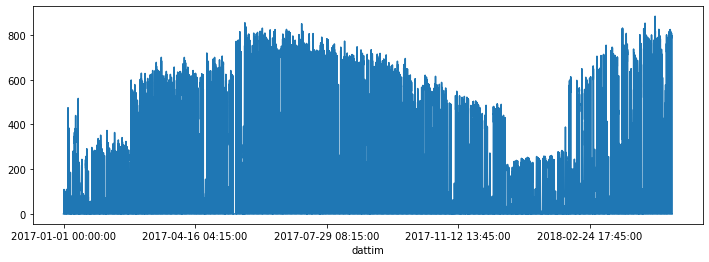

In [16]:
data['avepow'].plot(figsize=(12,4))

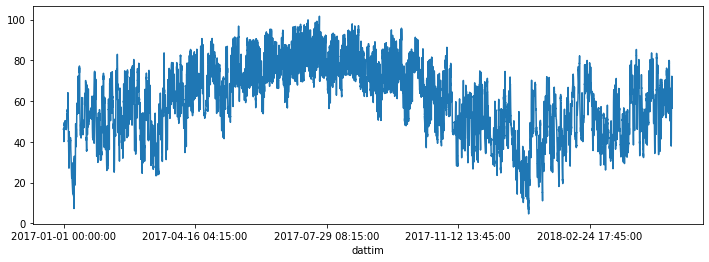

In [17]:
data['avetem'].plot(figsize=(12, 4))

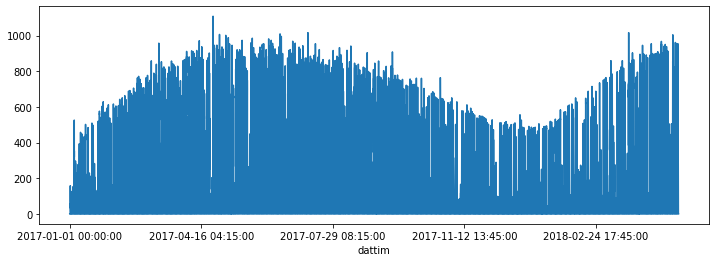

In [18]:
data['avegloirr'].plot(figsize=(12, 4))

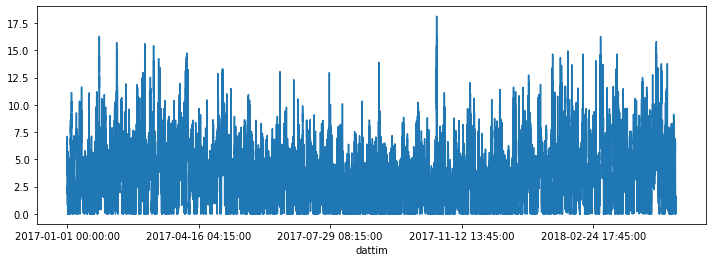

In [19]:
data['avewinspe'].plot(figsize=(12, 4))

In [20]:
# move 'avepow' to the very end for split_sequence function
temp_colname = list(data.columns)
temp_colname.append('avepow')
temp_colname.remove('avepow')
df2 = data[temp_colname]
df2.columns

Index(['avepow_t-1', 'avepow_t-2', 'avepow_t-3', 'avepow_t-4', 'avepow_t-5',
       'avepow_t-6', 'avepow_t-7', 'avepow_t-8', 'avepow_t-9', 'avepow_t-10',
       'avepow_t-11', 'avepow_t-12', 'avepow_t-13', 'avepow_t-14',
       'avepow_t-15', 'avepow_t-16', 'avepow_t-17', 'avepow_t-18',
       'avepow_t-19', 'avepow_t-20', 'avepow_t-21', 'avepow_t-22',
       'avepow_t-23', 'avepow_t-24', 'avepow_t-25', 'avepow_t-26',
       'avepow_t-27', 'avepow_t-28', 'avepow_t-29', 'avepow_t-30',
       'avepow_t-31', 'avepow_t-32', 'avepow_t-33', 'avepow_t-34',
       'avepow_t-35', 'avepow_t-36', 'avepow_t-37', 'avepow_t-38',
       'avepow_t-39', 'avepow_t-40', 'avepow_t-41', 'avepow_t-42',
       'avepow_t-43', 'avepow_t-44', 'avepow_t-45', 'avepow_t-46',
       'avepow_t-47', 'avepow_t-48', 'avepow_t-49', 'avepow_t-50',
       'avepow_t-51', 'avepow_t-52', 'avepow_t-53', 'avepow_t-54',
       'avepow_t-55', 'avepow_t-56', 'avepow_t-57', 'avepow_t-58',
       'avepow_t-59', 'avepow_t-60', 'ave

In [21]:
df2.shape

(46266, 100)

In [22]:
len(df2)

46266

In [23]:
df2.head(2)

,avepow_t-1,avepow_t-2,avepow_t-3,avepow_t-4,avepow_t-5,avepow_t-6,avepow_t-7,avepow_t-8,avepow_t-9,avepow_t-10,avepow_t-11,avepow_t-12,avepow_t-13,avepow_t-14,avepow_t-15,avepow_t-16,avepow_t-17,avepow_t-18,avepow_t-19,avepow_t-20,avepow_t-21,avepow_t-22,avepow_t-23,avepow_t-24,avepow_t-25,avepow_t-26,avepow_t-27,avepow_t-28,avepow_t-29,avepow_t-30,avepow_t-31,avepow_t-32,avepow_t-33,avepow_t-34,avepow_t-35,avepow_t-36,avepow_t-37,avepow_t-38,avepow_t-39,avepow_t-40,...,avepow_t-61,avepow_t-62,avepow_t-63,avepow_t-64,avepow_t-65,avepow_t-66,avepow_t-67,avepow_t-68,avepow_t-69,avepow_t-70,avepow_t-71,avepow_t-72,avepow_t-73,avepow_t-74,avepow_t-75,avepow_t-76,avepow_t-77,avepow_t-78,avepow_t-79,avepow_t-80,avepow_t-81,avepow_t-82,avepow_t-83,avepow_t-84,avepow_t-85,avepow_t-86,avepow_t-87,avepow_t-88,avepow_t-89,avepow_t-90,avepow_t-91,avepow_t-92,avepow_t-93,avepow_t-94,avepow_t-95,avepow_t-96,avetem,avegloirr,avewinspe,avepow
dattim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.67,1.04,3.92,11.05,15.24,25.79,30.60,30.89,44.74,51.96,61.25,70.19,74.39,111.41,...,201.66,141.00,91.12,35.76,3.40,1.16,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.08,0.0,6.22,0.0
2017-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.67,1.04,3.92,11.05,15.24,25.79,30.60,30.89,44.74,51.96,61.25,70.19,74.39,...,291.31,201.66,141.00,91.12,35.76,3.40,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.02,0.0,5.77,0.0


In [24]:
df2.tail(2)

,avepow_t-1,avepow_t-2,avepow_t-3,avepow_t-4,avepow_t-5,avepow_t-6,avepow_t-7,avepow_t-8,avepow_t-9,avepow_t-10,avepow_t-11,avepow_t-12,avepow_t-13,avepow_t-14,avepow_t-15,avepow_t-16,avepow_t-17,avepow_t-18,avepow_t-19,avepow_t-20,avepow_t-21,avepow_t-22,avepow_t-23,avepow_t-24,avepow_t-25,avepow_t-26,avepow_t-27,avepow_t-28,avepow_t-29,avepow_t-30,avepow_t-31,avepow_t-32,avepow_t-33,avepow_t-34,avepow_t-35,avepow_t-36,avepow_t-37,avepow_t-38,avepow_t-39,avepow_t-40,...,avepow_t-61,avepow_t-62,avepow_t-63,avepow_t-64,avepow_t-65,avepow_t-66,avepow_t-67,avepow_t-68,avepow_t-69,avepow_t-70,avepow_t-71,avepow_t-72,avepow_t-73,avepow_t-74,avepow_t-75,avepow_t-76,avepow_t-77,avepow_t-78,avepow_t-79,avepow_t-80,avepow_t-81,avepow_t-82,avepow_t-83,avepow_t-84,avepow_t-85,avepow_t-86,avepow_t-87,avepow_t-88,avepow_t-89,avepow_t-90,avepow_t-91,avepow_t-92,avepow_t-93,avepow_t-94,avepow_t-95,avepow_t-96,avetem,avegloirr,avewinspe,avepow
dattim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-30 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.29,3.46,32.79,119.76,232.74,371.59,508.42,587.46,632.92,676.14,706.87,733.98,754.72,768.80,784.99,796.73,796.30,795.67,794.12,792.37,792.94,786.85,786.95,...,777.14,759.56,734.30,701.59,666.48,614.42,469.50,310.34,156.15,53.55,12.10,3.11,0.68,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.33,0.0,0.40,0.0
2018-05-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.29,3.46,32.79,119.76,232.74,371.59,508.42,587.46,632.92,676.14,706.87,733.98,754.72,768.80,784.99,796.73,796.30,795.67,794.12,792.37,792.94,786.85,...,795.73,777.14,759.56,734.30,701.59,666.48,614.42,469.50,310.34,156.15,53.55,12.10,3.11,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.72,0.0,1.45,0.0


# Train Test Split

In [25]:
# how many rows per day?  we know it is every 15 minutes data
# 1 hour = four 15 minutes
# 1 day = 24 hours * 4 = 96 observations
# 1 week = 7 days = 96 obs * 7 =672 observations
test_days = 7
test_ind = 96 * test_days
test_ind

672

In [26]:
train = df2.iloc[:-test_ind]
test = df2.iloc[-test_ind:]
train.shape

(45594, 100)

In [27]:
test.shape

(672, 100)

# Scale Data

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [29]:
scaled_train = scaler.transform(train)
scaled_train.shape

(45594, 100)

In [30]:
scaled_test = scaler.transform(test)
scaled_test.shape

(672, 100)

# Time Series Generator

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [32]:
length = 96 # Number of Timesteps
batch_size = 10
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size = batch_size)

In [33]:
len(scaled_train)

45594

In [34]:
len(scaled_test)

672

In [35]:
len(generator)

4550

In [36]:
X, y = generator[0]

In [37]:
print(f'{X.flatten()}')

[0. 0. 0. ... 0. 0. 0.]


In [38]:
print(f'{y}')

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.00122247 0.00315804 0.00129038 0.00860254
  0.01765785 0.01998959 0.01628823 0.01932176 0.03044846 0.02825255
  0.04251466 0.02958821 0.02928259 0.0338442  0.02386073 0.03658343
  0.05553166 0.06633011 0.06397573 0.05370928 0.04163177 0.05097005
  0.03817943 0.07074457 0.06379463 0.09213773 0.1021778  0.08953433
  0.12351436 0.09397143 0.06386254 0.02448328 0.0138433  0.0078668
  0.01444321 0.00433523 0.00098476 0.00091685 0.00142621 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.     

# Create the Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [40]:
scaled_train.shape

(45594, 100)

In [42]:
# define model
model = Sequential()

# Simple LSTM layer
model.add(LSTM(100, input_shape=(length, scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
Total params: 90,500
Trainable params: 90,500
Non-trainable params: 0
_________________________________________________________________


# Early Stopping

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

model.fit_generator(generator, epochs=1, validation_data=validation_generator, callbacks=[early_stop])

4550/4550 [==============================] - 217s 48ms/step - loss: 0.0030 - val_loss: 0.0030


In [45]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

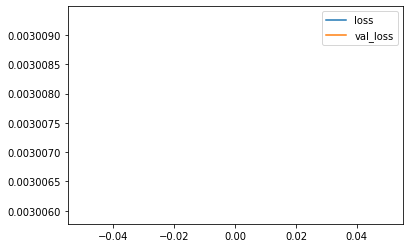

In [46]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluate on Test Data

In [49]:
first_eval_batch = scaled_train[-length:]
first_eval_batch.shape

(96, 100)

In [50]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))
first_eval_batch.shape

(1, 96, 100)

In [51]:
model.predict(first_eval_batch)

array([[ 0.04064082,  0.02702823, -0.00179652, -0.00990404, -0.00788833,
        -0.01930082, -0.01892969, -0.00298009, -0.01602084, -0.03009865,
        -0.01091678, -0.00830882,  0.01038747,  0.02556301,  0.03942478,
         0.01138216,  0.00523423,  0.03733505, -0.01401424, -0.01213776,
         0.01872255,  0.00729731,  0.02006532,  0.03087159,  0.02845896,
         0.02289747,  0.01129614,  0.01918718,  0.06792694,  0.12742016,
         0.21563101,  0.28517374,  0.33095336,  0.29537797,  0.22589967,
         0.19220719,  0.14909123,  0.147833  ,  0.1751347 ,  0.20106503,
         0.2626477 ,  0.28159177,  0.27587286,  0.25036132,  0.21175101,
         0.23367997,  0.15911633,  0.08650198,  0.08654039,  0.12631764,
         0.19139645,  0.28577682,  0.36268345,  0.3877265 ,  0.32974875,
         0.23655796,  0.14566338,  0.11469838,  0.11831601,  0.14873509,
         0.23648565,  0.32835898,  0.44498557,  0.5322864 ,  0.58587074,
         0.56076497,  0.43429077,  0.23489402,  0.1

In [52]:
scaled_test[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.79147896e-05, 1.90161411e-03, 1.00627080e-02, 2.91241256e-02,
       3.11162928e-02, 2.15289883e-02, 2.94636995e-02, 3.11842075e-02,
       4.43596767e-02, 7.94603038e-02, 1.31256650e-01, 2.91456319e-01,
       4.10544903e-01, 3.21440699e-01, 1.73409096e-01, 1.61727752e-01,
       1.69300251e-01, 1.10735064e-01, 1.53668531e-01, 1.67670296e-01,
       1.93149662e-01, 4.15615874e-01, 2.92973083e-01, 1.50657642e-01,
       2.14259842e-01, 3.09861227e-01, 1.36836982e-01, 9.47524506e-02,
       7.63135852e-02, 9.41751749e-02, 1.42632377e-01, 2.68478482e-01,
       3.81998053e-01, 4.85002151e-01, 3.60197406e-01, 1.53476105e-01,
      

# Now let's put this logic in a for loop to predict into the future for the entire test range

In [53]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:] # length = n_inputs
current_batch = first_eval_batch.reshape((1, length, n_features))

In [54]:
current_batch.shape

(1, 96, 100)

In [55]:
current_batch

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.67770419e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.02527076e-06, 7.50551876e-02, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 7.78145695e-02, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.50551876e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 3.65342163e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.65452539e-01, 0.00000000e+00]]])

In [58]:
import numpy as np

n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:] # length = n_inputs
current_batch = first_eval_batch.reshape((1, length, n_features))


for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [59]:
test_predictions

[array([ 0.04064082,  0.02702823, -0.00179652, -0.00990404, -0.00788833,
        -0.01930082, -0.01892969, -0.00298009, -0.01602084, -0.03009865,
        -0.01091678, -0.00830882,  0.01038747,  0.02556301,  0.03942478,
         0.01138216,  0.00523423,  0.03733505, -0.01401424, -0.01213776,
         0.01872255,  0.00729731,  0.02006532,  0.03087159,  0.02845896,
         0.02289747,  0.01129614,  0.01918718,  0.06792694,  0.12742016,
         0.21563101,  0.28517374,  0.33095336,  0.29537797,  0.22589967,
         0.19220719,  0.14909123,  0.147833  ,  0.1751347 ,  0.20106503,
         0.2626477 ,  0.28159177,  0.27587286,  0.25036132,  0.21175101,
         0.23367997,  0.15911633,  0.08650198,  0.08654039,  0.12631764,
         0.19139645,  0.28577682,  0.36268345,  0.3877265 ,  0.32974875,
         0.23655796,  0.14566338,  0.11469838,  0.11831601,  0.14873509,
         0.23648565,  0.32835898,  0.44498557,  0.5322864 ,  0.58587074,
         0.56076497,  0.43429077,  0.23489402,  0.1

In [60]:
scaled_test

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.80505415e-05, 1.78807947e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.17328520e-04, 1.36865342e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.89530686e-04, 1.65562914e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.02527076e-06, 1.98675497e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.20750552e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.00220751e-02, 0.00000000e+00]])

# Inverse Transformations and Compare

In [61]:
true_predictions = scaler.inverse_transform(test_predictions)

In [62]:
true_predictions

array([[ 35.90454197,  23.87836421,  -1.58714972, ...,   2.37131451,
          4.72660492,  26.74257362],
       [ 46.77184341,  31.98084552,   9.97828749, ...,  17.38959159,
          4.72821958,  48.3912842 ],
       [ 54.21772978,  44.61167408,  19.32034729, ...,  33.66671485,
          4.80625057,  66.51848941],
       ...,
       [203.07867842, 231.99191354, 229.87228453, ..., 370.6484046 ,
          5.98934   , 194.78623057],
       [222.51639123, 245.4616747 , 233.22396024, ..., 384.70830572,
          5.9910578 , 218.96818151],
       [249.21710807, 264.85225831, 241.89865483, ..., 402.00980973,
          5.92745393, 253.48459094]])

In [63]:
test

,avepow_t-1,avepow_t-2,avepow_t-3,avepow_t-4,avepow_t-5,avepow_t-6,avepow_t-7,avepow_t-8,avepow_t-9,avepow_t-10,avepow_t-11,avepow_t-12,avepow_t-13,avepow_t-14,avepow_t-15,avepow_t-16,avepow_t-17,avepow_t-18,avepow_t-19,avepow_t-20,avepow_t-21,avepow_t-22,avepow_t-23,avepow_t-24,avepow_t-25,avepow_t-26,avepow_t-27,avepow_t-28,avepow_t-29,avepow_t-30,avepow_t-31,avepow_t-32,avepow_t-33,avepow_t-34,avepow_t-35,avepow_t-36,avepow_t-37,avepow_t-38,avepow_t-39,avepow_t-40,...,avepow_t-61,avepow_t-62,avepow_t-63,avepow_t-64,avepow_t-65,avepow_t-66,avepow_t-67,avepow_t-68,avepow_t-69,avepow_t-70,avepow_t-71,avepow_t-72,avepow_t-73,avepow_t-74,avepow_t-75,avepow_t-76,avepow_t-77,avepow_t-78,avepow_t-79,avepow_t-80,avepow_t-81,avepow_t-82,avepow_t-83,avepow_t-84,avepow_t-85,avepow_t-86,avepow_t-87,avepow_t-88,avepow_t-89,avepow_t-90,avepow_t-91,avepow_t-92,avepow_t-93,avepow_t-94,avepow_t-95,avepow_t-96,avetem,avegloirr,avewinspe,avepow
dattim,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-24 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.68,8.89,25.73,27.49,19.02,26.03,27.55,39.19,70.20,115.96,257.49,362.70,283.98,153.20,142.88,149.57,97.83,135.76,148.13,...,179.89,253.76,286.48,366.94,595.70,609.31,463.53,120.17,72.73,67.87,47.21,26.52,8.67,0.33,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.98,0.02,3.24,0.0
2018-04-24 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.68,8.89,25.73,27.49,19.02,26.03,27.55,39.19,70.20,115.96,257.49,362.70,283.98,153.20,142.88,149.57,97.83,135.76,...,132.89,179.89,253.76,286.48,366.94,595.70,609.31,463.53,120.17,72.73,67.87,47.21,26.52,8.67,0.33,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.34,0.13,2.48,0.0
2018-04-24 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.68,8.89,25.73,27.49,19.02,26.03,27.55,39.19,70.20,115.96,257.49,362.70,283.98,153.20,142.88,149.57,97.83,...,128.98,132.89,179.89,253.76,286.48,366.94,595.70,609.31,463.53,120.17,72.73,67.87,47.21,26.52,8.67,0.33,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.56,0.21,3.00,0.0
2018-04-24 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.68,8.89,25.73,27.49,19.02,26.03,27.55,39.19,70.20,115.96,257.49,362.70,283.98,153.20,142.88,149.57,...,128.36,128.98,132.89,179.89,253.76,286.48,366.94,595.70,609.31,463.53,120.17,72.73,67.87,47.21,26.52,8.67,0.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.50,0.22,2.19,0.0
2018-04-24 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,1.68,8.89,25.73,27.49,19.02,26.03,27.55,39.19,70.20,115.96,257.49,362.70,283.98,153.20,142.88,...,106.00,128.36,128.98,132.89,179.89,253.76,286.48,366.94,595.70,609.31,463.53,120.17,72.73,67.87,47.21,26.52,8.67,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.70,0.24,2.77,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-30 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.29,3.46,32.79,119.76,232.74,371.59,508.42,587.46,632.92,676.14,706.87,733.98,754.72,768.80,784.99,796.73,796.30,795.67,794.12,792.37,792.94,786.85,786.95,790.24,787.74,788.99,...,701.59,666.48,614.42,469.50,310.34,156.15,53.55,12.10,3.11,0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.24,0.00,0.29,0

In [71]:
import pandas as pd

true_predictions = pd.DataFrame(data=true_predictions, columns=test.columns)
true_predictions.shape
type(true_predictions)

pandas.core.frame.DataFrame

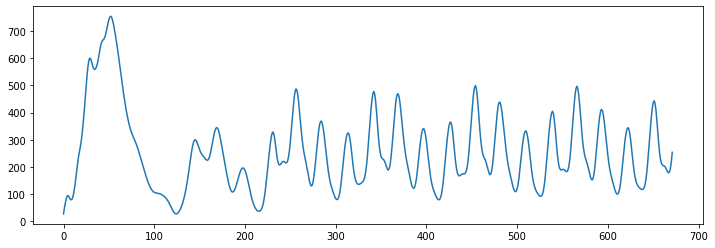

In [72]:
true_predictions['avepow'].plot(figsize=(12, 4))

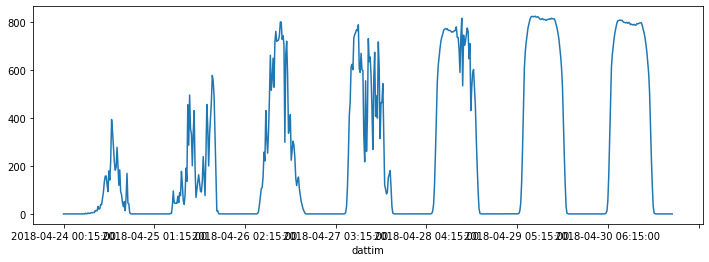

In [66]:
test['avepow'].plot(figsize=(12, 4))